In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
df_bp =  pd.read_excel('data/X_bp.xlsx', dtype=np.float64)
df_nup =  pd.read_excel('data/X_nup.xlsx', dtype=np.float64)
pd.set_option('display.precision',3)

In [4]:
df_bp.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,1.857,2030.0,738.737,30.00,22.268,100.000,210.0,70.0,3000.0,220.0
1,1.0,1.857,2030.0,738.737,50.00,23.750,284.615,210.0,70.0,3000.0,220.0
2,2.0,1.857,2030.0,738.737,49.90,33.000,284.615,210.0,70.0,3000.0,220.0
3,3.0,1.857,2030.0,738.737,129.00,21.250,300.000,210.0,70.0,3000.0,220.0
4,4.0,2.771,2030.0,753.000,111.86,22.268,284.615,210.0,70.0,3000.0,220.0


In [5]:
df_bp.shape

(1023, 11)

In [6]:
df_nup.head()

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,0.0,4.0,57.0
1,1.0,0.0,4.0,60.0
2,2.0,0.0,4.0,70.0
3,3.0,0.0,5.0,47.0
4,4.0,0.0,5.0,57.0


In [7]:
df_nup.shape

(1040, 4)

In [8]:
df=df_bp.merge(df_nup, how='inner')

In [9]:
df.tail()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1018,1018.0,2.271,1952.088,912.856,86.992,20.123,324.775,209.199,73.091,2387.292,125.008,90.0,9.076,47.020
1019,1019.0,3.444,2050.089,444.733,145.982,19.600,254.215,350.661,72.921,2360.393,117.730,90.0,10.566,53.751
1020,1020.0,3.281,1972.373,416.837,110.533,23.958,248.423,740.143,74.734,2662.906,236.607,90.0,4.161,67.630
1021,1021.0,3.705,2066.800,741.476,141.398,19.247,275.780,641.468,74.043,2071.716,197.126,90.0,6.313,58.261
1022,1022.0,3.808,1890.413,417.316,129.183,27.475,300.953,758.748,74.310,2856.329,194.754,90.0,6.079,77.434


In [10]:
df.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,1.857,2030.0,738.737,30.00,22.268,100.000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1,1.0,1.857,2030.0,738.737,50.00,23.750,284.615,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2,2.0,1.857,2030.0,738.737,49.90,33.000,284.615,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3,3.0,1.857,2030.0,738.737,129.00,21.250,300.000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4,4.0,2.771,2030.0,753.000,111.86,22.268,284.615,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


In [11]:
df = df.drop(df.columns[0], axis=1)

In [12]:
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857,2030.0,738.737,30.00,22.268,100.000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1,1.857,2030.0,738.737,50.00,23.750,284.615,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2,1.857,2030.0,738.737,49.90,33.000,284.615,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3,1.857,2030.0,738.737,129.00,21.250,300.000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4,2.771,2030.0,753.000,111.86,22.268,284.615,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


In [13]:
columns_name = df.columns

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

Сэкономим немного памяти и переведем все во float32


In [15]:
df.astype('float32')

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857,2030.000,738.737,30.000,22.268,100.000,210.000,70.000,3000.000,220.000,0.0,4.000,57.000
1,1.857,2030.000,738.737,50.000,23.750,284.615,210.000,70.000,3000.000,220.000,0.0,4.000,60.000
2,1.857,2030.000,738.737,49.900,33.000,284.615,210.000,70.000,3000.000,220.000,0.0,4.000,70.000
3,1.857,2030.000,738.737,129.000,21.250,300.000,210.000,70.000,3000.000,220.000,0.0,5.000,47.000
4,2.771,2030.000,753.000,111.860,22.268,284.615,210.000,70.000,3000.000,220.000,0.0,5.000,57.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271,1952.088,912.856,86.992,20.123,324.775,209.199,73.091,2387.292,125.008,90.0,9.076,47.020
1019,3.444,2050.089,444.733,145.982,19.600,254.215,350.661,72.921,2360.393,117.730,90.0,10.566,53.751
1020,3.281,1972.373,416.837,110.533,23.958,248.423,740.143,74.734,2662.906,236.607,90.0,4.161,67.630
1021,3.705,2066.800,741.476,141.398,19.247,275.780,641.468,74.043,2071.716,197.126,90.0,6.313,58.261


In [16]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col}, процент пропусков: {pct_missing*100}')

Соотношение матрица-наполнитель, процент пропусков: 0.0
Плотность, кг/м3, процент пропусков: 0.0
модуль упругости, ГПа, процент пропусков: 0.0
Количество отвердителя, м.%, процент пропусков: 0.0
Содержание эпоксидных групп,%_2, процент пропусков: 0.0
Температура вспышки, С_2, процент пропусков: 0.0
Поверхностная плотность, г/м2, процент пропусков: 0.0
Модуль упругости при растяжении, ГПа, процент пропусков: 0.0
Прочность при растяжении, МПа, процент пропусков: 0.0
Потребление смолы, г/м2, процент пропусков: 0.0
Угол нашивки, град, процент пропусков: 0.0
Шаг нашивки, процент пропусков: 0.0
Плотность нашивки, процент пропусков: 0.0


Видим, что процент пропущенных значений 0

In [17]:
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000,1023.000,1023.000,1023.000,1023.000,1023.000,1023.000,1023.000,1023.000,1023.000,1023.000,1023.000,1023.000
mean,2.930,1975.735,739.923,110.571,22.244,285.882,482.732,73.329,2466.923,218.423,44.252,6.899,57.154
std,0.913,73.729,330.232,28.296,2.406,40.943,281.315,3.119,485.628,59.736,45.016,2.563,12.351
min,0.389,1731.765,2.437,17.740,14.255,100.000,0.604,64.054,1036.857,33.803,0.000,0.000,0.000
25%,2.318,1924.155,500.047,92.443,20.608,259.067,266.817,71.245,2135.850,179.628,0.000,5.080,49.799
50%,2.907,1977.622,739.664,110.565,22.231,285.897,451.864,73.269,2459.525,219.199,0.000,6.916,57.342
75%,3.553,2021.374,961.813,129.730,23.962,313.002,693.225,75.357,2767.193,257.482,90.000,8.586,64.945
max,5.592,2207.773,1911.536,198.953,33.000,413.273,1399.542,82.682,3848.437,414.591,90.000,14.441,103.989


Видим, что признаки разных масштабов

In [18]:
df.var()

Соотношение матрица-наполнитель              0.834
Плотность, кг/м3                          5435.999
модуль упругости, ГПа                   109052.897
Количество отвердителя, м.%                800.659
Содержание эпоксидных групп,%_2              5.790
Температура вспышки, С_2                  1676.351
Поверхностная плотность, г/м2            79137.955
Модуль упругости при растяжении, ГПа         9.728
Прочность при растяжении, МПа           235834.560
Потребление смолы, г/м2                   3568.381
Угол нашивки, град                        2026.422
Шаг нашивки                                  6.571
Плотность нашивки                          152.546
dtype: float64

In [19]:
type(df.var)

method

Строим матрицу гарфиков распределения признаков без столбца с нашивкой (так как там 0 либо 90). Видим, что распределение каждого признака близко нормальному и нет корреляции медлу ними

In [20]:
#g = sns.PairGrid(df.drop(df.columns[10], axis=1))
#g.map_diag(sns.histplot, bins=50)
#g.map_offdiag(sns.scatterplot)

Видим, что признаки почти не коррелируют между собой

C:\Users\vagid\AppData\Local\Temp/ipykernel_18764/2259935260.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Карта корреляции параметров')

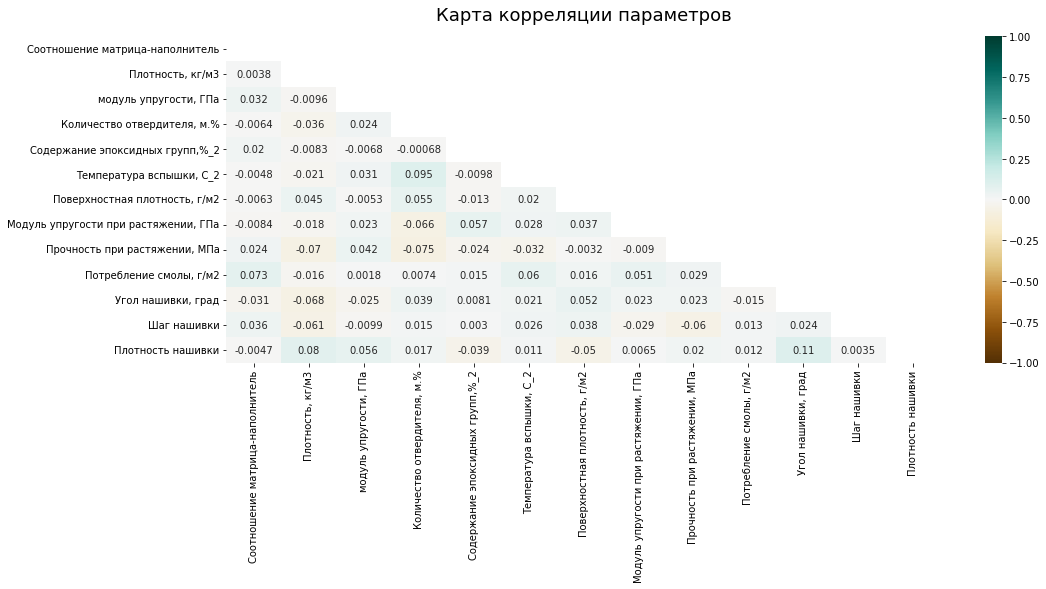

In [21]:
plt.figure(figsize=(16, 6)) 
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool)) 
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Карта корреляции параметров', fontdict={'fontsize':18}, pad=16)
#plt.savefig('Карта корреляции параметров.png', dpi=300, bbox_inches='tight')

Делаем датасет из первых 22 строчек


Удаляем все незаполненные ячейки

In [23]:
df = df.drop(df.columns[10], axis=1)
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Плотность нашивки
0,1.857,2030.000,738.737,30.000,22.268,100.000,210.000,70.000,3000.000,220.000,57.000
1,1.857,2030.000,738.737,50.000,23.750,284.615,210.000,70.000,3000.000,220.000,60.000
2,1.857,2030.000,738.737,49.900,33.000,284.615,210.000,70.000,3000.000,220.000,70.000
3,1.857,2030.000,738.737,129.000,21.250,300.000,210.000,70.000,3000.000,220.000,47.000
4,2.771,2030.000,753.000,111.860,22.268,284.615,210.000,70.000,3000.000,220.000,57.000
...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271,1952.088,912.856,86.992,20.123,324.775,209.199,73.091,2387.292,125.008,47.020
1019,3.444,2050.089,444.733,145.982,19.600,254.215,350.661,72.921,2360.393,117.730,53.751
1020,3.281,1972.373,416.837,110.533,23.958,248.423,740.143,74.734,2662.906,236.607,67.630
1021,3.705,2066.800,741.476,141.398,19.247,275.780,641.468,74.043,2071.716,197.126,58.261


In [24]:
for i in df.columns:
    df.drop_duplicates(subset = i, inplace = True)

In [25]:
df_22_drop = df

In [26]:
df_22_drop

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Плотность нашивки
0,1.857,2030.000,738.737,30.000,22.268,100.000,210.000,70.000,3000.000,220.000,57.000
23,2.587,1953.275,1136.596,137.627,22.345,234.717,555.893,80.803,2587.343,246.613,70.000
24,2.500,1942.596,901.520,146.252,23.082,351.232,864.725,76.178,3705.673,226.223,47.000
26,1.856,2018.220,836.294,135.402,26.436,327.510,150.961,77.211,2473.187,123.345,60.000
40,3.034,1968.401,455.871,61.421,23.491,316.415,637.377,75.090,2848.490,311.052,64.302
...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271,1952.088,912.856,86.992,20.123,324.775,209.199,73.091,2387.292,125.008,47.020
1019,3.444,2050.089,444.733,145.982,19.600,254.215,350.661,72.921,2360.393,117.730,53.751
1020,3.281,1972.373,416.837,110.533,23.958,248.423,740.143,74.734,2662.906,236.607,67.630
1021,3.705,2066.800,741.476,141.398,19.247,275.780,641.468,74.043,2071.716,197.126,58.261


Удаляем столбцы состоящие из одинаковых значений

In [68]:
df_22_drop = df_22[['Соотношение матрица-наполнитель', 'Плотность, кг/м3']]

In [69]:
df_22_drop

,Соотношение матрица-наполнитель,"Плотность, кг/м3"
0,3.557,1930.0
1,3.532,2100.0
2,2.920,2160.0
3,2.877,1990.0
4,2.935,2030.0
5,3.557,1880.0
6,4.194,1950.0
7,4.898,1890.0


C:\Users\vagid\AppData\Local\Temp/ipykernel_18764/1468438889.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_22_drop.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Карта корреляции параметров')

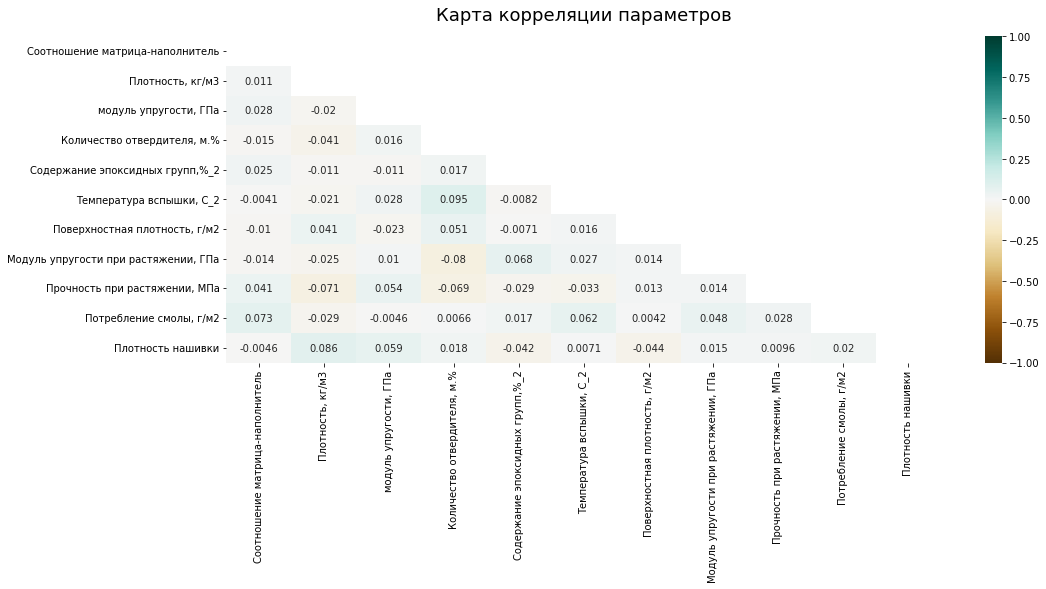

In [27]:
plt.figure(figsize=(16, 6)) 
mask = np.triu(np.ones_like(df_22_drop.corr(), dtype=np.bool)) 
heatmap = sns.heatmap(df_22_drop.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Карта корреляции параметров', fontdict={'fontsize':18}, pad=16)
#plt.savefig('Карта корреляции параметров.png', dpi=300, bbox_inches='tight')

Плотность и поверхностная плотность - связаны через по формуле поверхностная плотность = полная масса объекта/полная площадь объекта, а полная масса связана с плотностью чере объем, m=плотность на объем, так что тут нехватает либо размеров заготовок либо объема

Модуль упругости - по определению напряжение, при котором образец растянется до разрушения. А прочность - напряжение при котором разрушится, но они имееют связь через размеры заготовки для исследования, которых нет

Плотность и поверхностная плотность связана через площадь заготовки

Поэтому будем Модуль упругости и Прочнсть при растяжении рассматривать вместе, а вместо плотности и поверхностной плотности – оставим только плотность

In [31]:
df_22_drop2 = df_22_drop.drop(columns='Поверхностная плотность, г/м2')

C:\Users\vagid\AppData\Local\Temp/ipykernel_18764/2824071352.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_22_drop2.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Карта корреляции параметров')

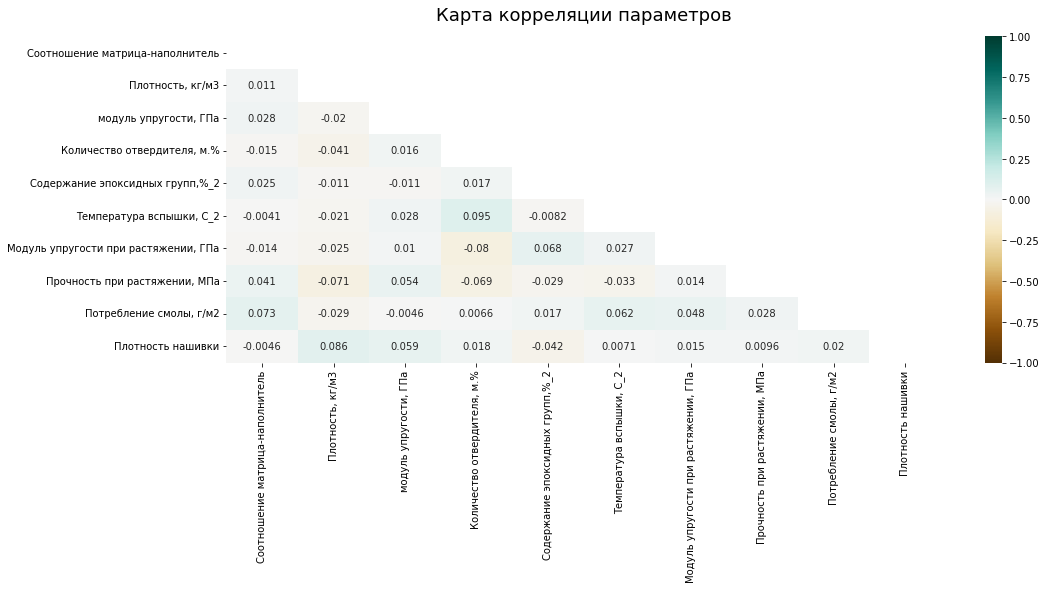

In [32]:
plt.figure(figsize=(16, 6)) 
mask = np.triu(np.ones_like(df_22_drop2.corr(), dtype=np.bool)) 
heatmap = sns.heatmap(df_22_drop2.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Карта корреляции параметров', fontdict={'fontsize':18}, pad=16)
#plt.savefig('Карта корреляции параметров.png', dpi=300, bbox_inches='tight')

In [33]:
df_22_drop3= df_22_drop2.drop(columns='Потребление смолы, г/м2')

C:\Users\vagid\AppData\Local\Temp/ipykernel_18764/2620038186.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_22_drop3.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Карта корреляции параметров')

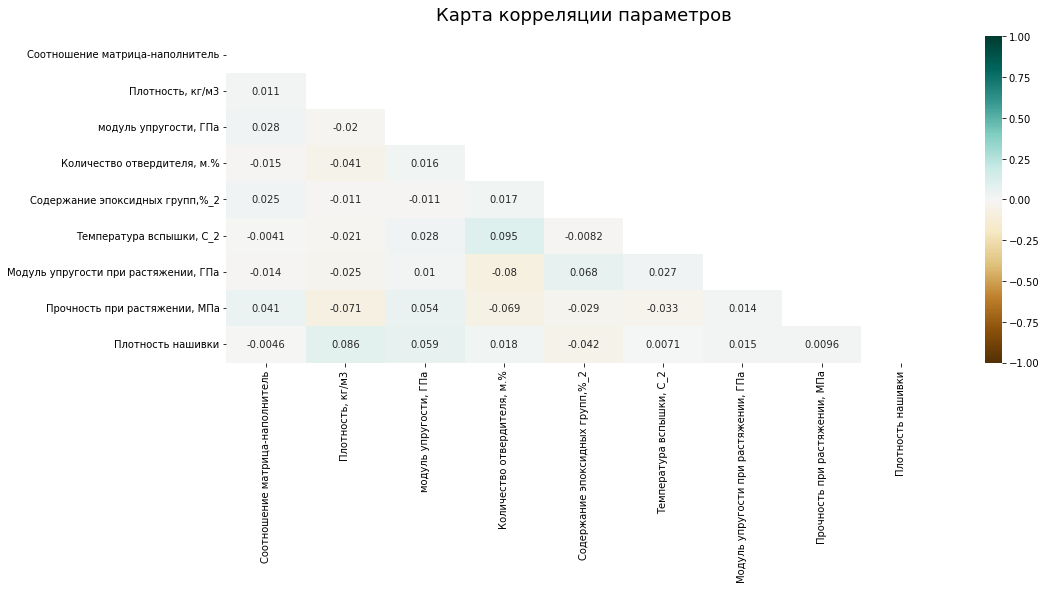

In [34]:
plt.figure(figsize=(16, 6)) 
mask = np.triu(np.ones_like(df_22_drop3.corr(), dtype=np.bool)) 
heatmap = sns.heatmap(df_22_drop3.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Карта корреляции параметров', fontdict={'fontsize':18}, pad=16)
#plt.savefig('Карта корреляции параметров.png', dpi=300, bbox_inches='tight')

Вот и получаем в результате для анализа датасет, при этом Модуль упргости и Прочность при растяжении можно считать вместе

In [35]:
df_22_drop3

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа",Плотность нашивки
0,1.857,2030.000,738.737,30.000,22.268,100.000,70.000,3000.000,57.000
23,2.587,1953.275,1136.596,137.627,22.345,234.717,80.803,2587.343,70.000
24,2.500,1942.596,901.520,146.252,23.082,351.232,76.178,3705.673,47.000
26,1.856,2018.220,836.294,135.402,26.436,327.510,77.211,2473.187,60.000
40,3.034,1968.401,455.871,61.421,23.491,316.415,75.090,2848.490,64.302
...,...,...,...,...,...,...,...,...,...
1018,2.271,1952.088,912.856,86.992,20.123,324.775,73.091,2387.292,47.020
1019,3.444,2050.089,444.733,145.982,19.600,254.215,72.921,2360.393,53.751
1020,3.281,1972.373,416.837,110.533,23.958,248.423,74.734,2662.906,67.630
1021,3.705,2066.800,741.476,141.398,19.247,275.780,74.043,2071.716,58.261


Видим что тут все признаки можно категоризировать и перейти в решение классификации. 'Соотношение матрица-наполнитель' обычно представляют как 1:4 или 2:3 какими-то простыми дробями, явно никто не сможет смешивать в пропорциях с такой точностью, как указано в таблице. Поэтому преобразуем этот столбец на категории по принципу округления 3,5 3 4 и 5, соответственно будут такие категории 1 1 0 0 0 1 2 3, для остальных столбцов то же проведем категоризацию

Как мы видим 'Модуль упругости при растяжении, ГПа' и 'Прочность при растяжении, МПа' имеею одинаковые категории, так что можно оставить только одно, удалим 'Прочность при растяжении, МПа'

In [60]:
#df_cat_drop = df_cat_drop.drop(columns='CAT Прочность при растяжении, МПа')

Чтобы можно было делить датасет на тренировочные выборки, добавим пару раз копии, конечно есть шанс что в выборки попадут те же значения, что и в обучение, но хоть что-то для разбиение будет

In [61]:
#df_cat_append = df_cat_drop.append(df_cat_drop, ignore_index=True) #.append(df_cat_drop, ignore_index=True)

In [62]:
#df_cat_append

In [63]:
#X_cat=df_cat_append.drop(columns='CAT Модуль упругости при растяжении, ГПа')
#y_cat=df_cat_append['CAT Модуль упругости при растяжении, ГПа']

In [64]:
#from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(max_depth=2, random_state=0)
#clf.fit(X_cat_train, y_cat_train)

In [65]:
#y_cat_pred = clf.predict(X_cat_test)
#clf.score(X_cat_test,y_cat_pred)

In [66]:
#y_cat_pred_20 = clf.predict([[2,1,2,3]])
#
#def decoder (y_predict):
#    if y_predict == 0:
#        return print (f'Модуль упругости при растяжении = 70 ГПа, Прочность при растяжении = 3000 МПа')
#    if y_predict == 1:
#        return print (f'Модуль упругости при растяжении = 75 ГПа, Прочность при растяжении = 1800 МПа')
#    if y_predict == 2:
#        return print (f'Модуль упругости при растяжении = 78 ГПа, Прочность при растяжении = 2000 МПа')

In [67]:
#decoder (y_cat_pred_20)

Тут без проблем все варианты уже выучены, поэтому 100% результат, но просто чтобы показать, что можно и так. Для рассмотрения регрессии перейдем к гипотезе 2

# Гипотеза 2

Поиск связи где их нет, но забавно получилось

Обращаем внимание на начало датасета, видим там нетепичные целые значения, а так же повторяющиеся дробные, которые неожиданно являются средними, заполняем целые числа этими средними, сделаем это в exel (жалко время, проще в другом ПО)